In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

In [3]:
ac={}
f1={}
pr={}
rc={}

In [4]:
df=pd.read_csv('Diabetes_dataset.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
x=df.iloc[:,:-1]

In [13]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(x)

StandardScaler()

In [16]:
standardized_data = scaler.transform(x)

In [17]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
x= standardized_data

In [19]:
y=df['Outcome']

In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred=lr.predict(x_test)

In [27]:
ac['Logistic Regression']=accuracy_score(y_test,y_pred)*100

In [28]:
f1['Logistic Regression']=f1_score( y_test,y_pred)*100
pr['Logistic Regression']=precision_score( y_test,y_pred)*100
rc['Logistic Regression']=recall_score(y_test,y_pred)*100

# GaussianNB

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
nb=GaussianNB()

In [31]:
nb.fit(x_train,y_train)

GaussianNB()

In [32]:
y_pred=nb.predict(x_test)

In [33]:
ac['GaussianNB']=accuracy_score(y_test,y_pred)*100

In [34]:
f1['GaussianNB']=f1_score( y_test,y_pred)*100
pr['GaussianNB']=precision_score( y_test,y_pred)*100
rc['GaussianNB']=recall_score(y_test,y_pred)*100

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [36]:
dt=DecisionTreeClassifier()

In [37]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

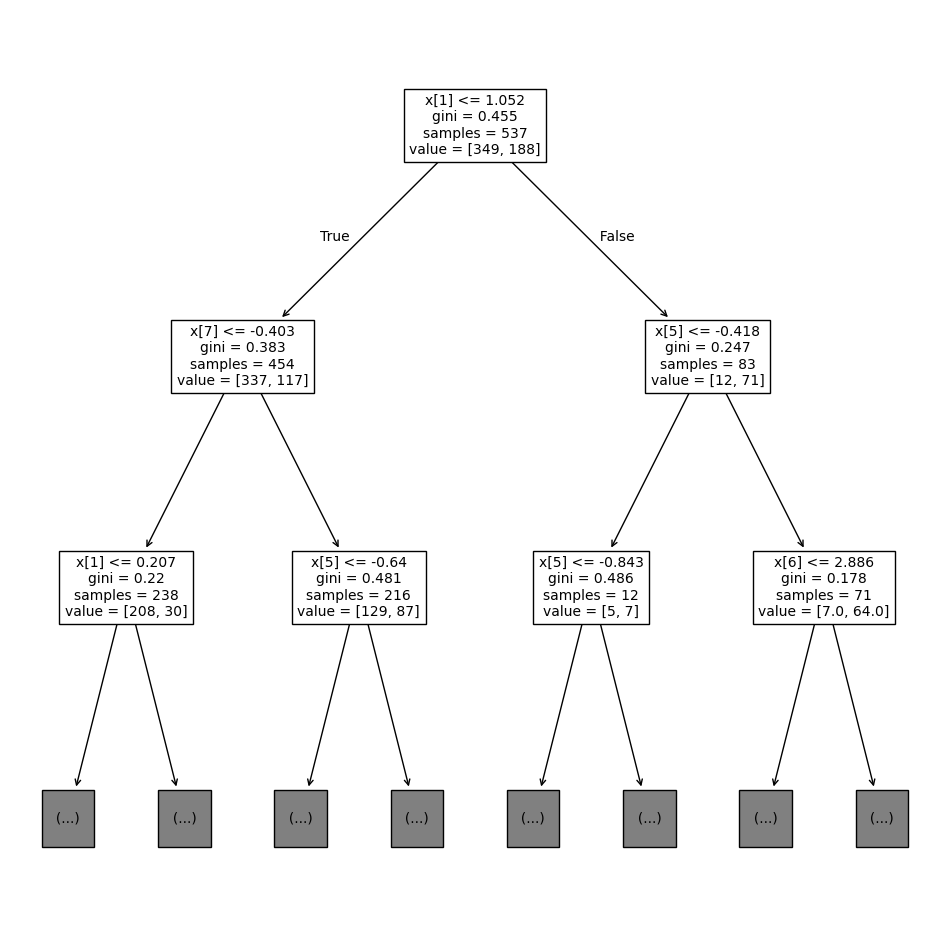

In [38]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(dt, fontsize=10,max_depth=2)
plt.show()

In [39]:
y_pred=dt.predict(x_test)

In [40]:
ac['Decision Tree']=accuracy_score(y_test,y_pred)*100

In [41]:
f1['Decision Tree']=f1_score( y_test,y_pred)*100
pr['Decision Tree']=precision_score( y_test,y_pred)*100
rc['Decision Tree']=recall_score(y_test,y_pred)*100

# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn=KNeighborsClassifier()

In [44]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred=knn.predict(x_test)

In [46]:
ac['KNeighborsClassifier']=accuracy_score(y_test,y_pred)*100

In [47]:
f1['KNeighborsClassifier']=f1_score( y_test,y_pred)*100
pr['KNeighborsClassifier']=precision_score( y_test,y_pred)*100
rc['KNeighborsClassifier']=recall_score(y_test,y_pred)*100

# SVM classifier

In [48]:
from sklearn.svm import SVC

In [49]:
svc=SVC()

In [50]:
svc.fit(x_train,y_train)

SVC()

In [51]:
y_pred=svc.predict(x_test)

In [52]:
ac['Support vector machine classifier']=accuracy_score(y_test,y_pred)*100

In [53]:
f1['Support vector machine classifier']=f1_score( y_test,y_pred)*100
pr['Support vector machine classifier']=precision_score( y_test,y_pred)*100
rc['Support vector machine classifier']=recall_score(y_test,y_pred)*100

# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf=RandomForestClassifier()

In [56]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_pred=rf.predict(x_test)

In [58]:
ac['RandomForestClassifier']=accuracy_score(y_test,y_pred)*100

In [59]:
f1['RandomForestClassifier']=f1_score( y_test,y_pred)*100
pr['RandomForestClassifier']=precision_score( y_test,y_pred)*100
rc['RandomForestClassifier']=recall_score(y_test,y_pred)*100

# Accuracy Score of different models

In [60]:
print("Accuracy score of different models :- \n")
for key,val in ac.items():
    print(key,val)

Accuracy score of different models :- 

Logistic Regression 73.59307359307358
GaussianNB 74.45887445887446
Decision Tree 68.83116883116884
KNeighborsClassifier 69.26406926406926
Support vector machine classifier 74.89177489177489
RandomForestClassifier 74.89177489177489


In [61]:
print("F1 score of different models :- \n")
for key,val in f1.items():
    print(key,val)

F1 score of different models :- 

Logistic Regression 62.11180124223602
GaussianNB 64.24242424242425
Decision Tree 59.55056179775281
KNeighborsClassifier 53.59477124183007
Support vector machine classifier 62.33766233766234
RandomForestClassifier 64.19753086419753


In [62]:
print("Precision score of different models :- \n")
for key,val in pr.items():
    print(key,val)

Precision score of different models :- 

Logistic Regression 61.72839506172839
GaussianNB 62.35294117647059
Decision Tree 54.08163265306123
KNeighborsClassifier 56.16438356164384
Support vector machine classifier 64.86486486486487
RandomForestClassifier 63.41463414634146


In [63]:
print("Recall score of different models :- \n")
for key,val in pr.items():
    print(key,val)

Recall score of different models :- 

Logistic Regression 61.72839506172839
GaussianNB 62.35294117647059
Decision Tree 54.08163265306123
KNeighborsClassifier 56.16438356164384
Support vector machine classifier 64.86486486486487
RandomForestClassifier 63.41463414634146
